<a href="https://colab.research.google.com/github/Dema988/test_repo/blob/main/%22opencv_ipynb%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [ ]:
import cv2
import time
import math
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

WIND_X = 800
WIND_Y = 500

canvas = cv2.imread("/content/drive/MyDrive/1c_mouse.jpg")
print("Высота:"+str(canvas.shape[0]))
print("Ширина:" + str(canvas.shape[1]))
print("Количество каналов:" + str(canvas.shape[2]))


Высота:400
Ширина:600
Количество каналов:3


In [ ]:
print(canvas.shape, type(canvas[0,0,0]))

(400, 600, 3) <class 'numpy.uint8'>


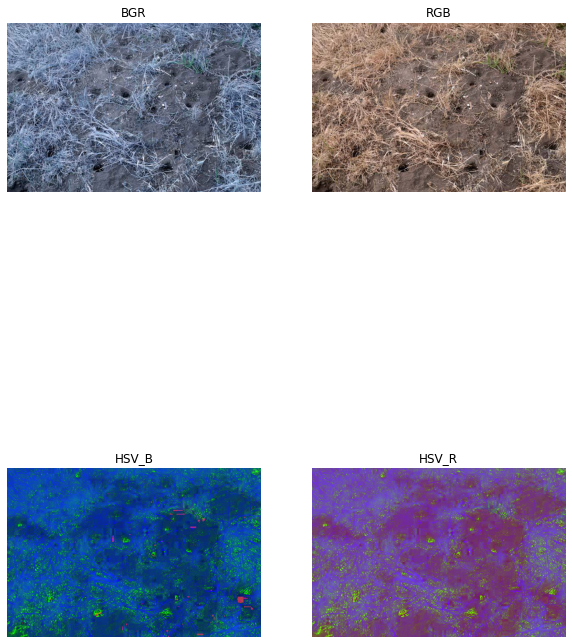

In [ ]:
# Представление входных данных в других форматах
img_hsv_B = cv2.cvtColor(canvas,cv2.COLOR_BGR2HSV)
img_hsv_R = cv2.cvtColor(canvas,cv2.COLOR_RGB2HSV)
im_rgb = cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(10, 15))

plt.subplot(221)
plt.imshow(canvas)
plt.axis('off')
plt.title('BGR')

plt.subplot(222)
plt.imshow(im_rgb)
plt.axis('off')
plt.title('RGB')

plt.subplot(223)
plt.imshow(img_hsv_B)
plt.axis('off')
plt.title('HSV_B')

plt.subplot(224)
plt.imshow(img_hsv_R)
plt.axis('off')
plt.title('HSV_R')

plt.show()

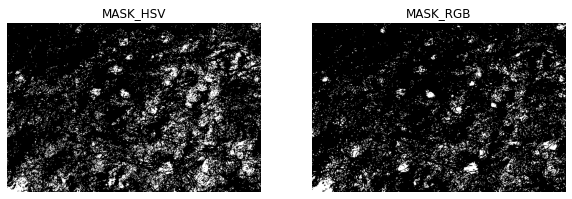

In [ ]:
# Маскирование
mask = cv2.inRange(im_rgb, (80,34,20),(255,255,255))
mask_HSV = cv2.inRange(img_hsv_B, (0,0,0),(255,157,92))

# Маски  подготовка к отображению
negative_RGB_mask = 255-mask
plt.figure(figsize=(10, 15))

#1 - одна строка, 2 - два элемента, 2 - ставим элемент вторым в строке
plt.subplot(122)
plt.imshow(negative_RGB_mask,cmap='gray')
plt.axis('off')
plt.title('MASK_RGB')

plt.subplot(121)
plt.imshow(mask_HSV,cmap='gray')
plt.axis('off')
plt.title('MASK_HSV')

#Отображение
plt.show()

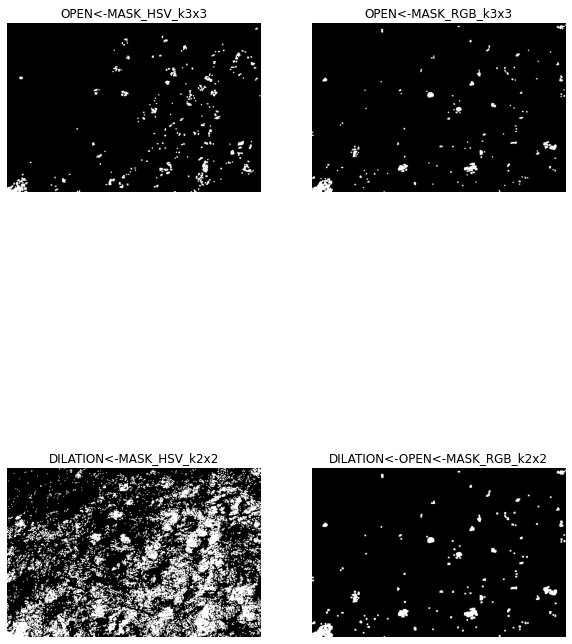

In [ ]:
# Морфологические операции               
# Ядро обработки маски расширения
kernel_d = np.ones((2,2),np.uint8)

#Операция расширения над mask_HSV
dilation_HSV = cv2.dilate(mask_HSV,kernel_d,iterations = 1)

#Операция расширения над RGB маской после открытия
dilation_RGB = cv2.dilate(opening_RGB,kernel_d,iterations = 1)

#Морфологические операции подготовка к отображению

plt.figure(figsize=(10, 15))

plt.subplot(221)
plt.imshow(opening_HSV,cmap='gray')
plt.axis('off')
plt.title('OPEN<-MASK_HSV_k3x3')

plt.subplot(222)
plt.imshow(opening_RGB,cmap='gray')
plt.axis('off')
plt.title('OPEN<-MASK_RGB_k3x3')

plt.subplot(223)
plt.imshow(dilation_HSV,cmap='gray')
plt.axis('off')
plt.title('DILATION<-MASK_HSV_k2x2')

plt.subplot(224)
plt.imshow(dilation_RGB,cmap='gray')
plt.axis('off')
plt.title('DILATION<-OPEN<-MASK_RGB_k2x2')

#Отображение
plt.show()

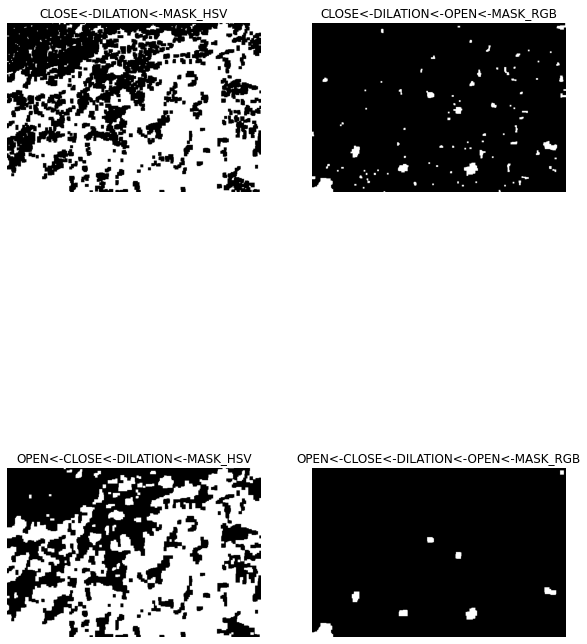

Достигнут не идеальный результат, можно было бы произвести еще пару итераций
но после испытания метода связных компонент нет смысла татить время!
Лучший результат при использовании обоих методов в связке!!!


In [ ]:
# Морфологические операции


kernel = np.ones((7,7),np.uint8) # Ядро обработки маски
# Закрытие
closing_HSV = cv2.morphologyEx(dilation_HSV, cv2.MORPH_CLOSE, kernel)
closing_RGB = cv2.morphologyEx(dilation_RGB, cv2.MORPH_CLOSE, kernel)

#Открытие
opening_HSV = cv2.morphologyEx(closing_HSV, cv2.MORPH_OPEN,np.ones((5,5),np.uint8))
opening_RGB = cv2.morphologyEx(closing_RGB, cv2.MORPH_OPEN,np.ones((9,9),np.uint8))

#Морфологические операции подготовка к отображению

plt.figure(figsize=(10,15))

plt.subplot(221)
plt.imshow(closing_HSV,cmap='gray')
plt.axis('off')
plt.title('CLOSE<-DILATION<-MASK_HSV')

plt.subplot(222)
plt.imshow(closing_RGB,cmap='gray')
plt.axis('off')
plt.title('CLOSE<-DILATION<-OPEN<-MASK_RGB')

plt.subplot(223)
plt.imshow(opening_HSV,cmap='gray')
plt.axis('off')
plt.title('OPEN<-CLOSE<-DILATION<-MASK_HSV')

plt.subplot(224)
plt.imshow(opening_RGB,cmap='gray')
plt.axis('off')
plt.title('OPEN<-CLOSE<-DILATION<-OPEN<-MASK_RGB')

#Отображение
plt.show()
